In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import glob
os.chdir(r"C:\Users\muham\Desktop\YOLOMODEL1")
print(os.getcwd())
Coin = "BNB"

C:\Users\muham\Desktop\YOLOMODEL1


In [34]:
df = pd.read_excel(f"1_PrepareDataset/{Coin}DailyWithTech.xlsx", index_col="Date")
# df.index = pd.to_datetime(df.index).strftime('%Y-%m-%d')
df.head(2)

,Open,High,Low,Close,Volume,RSI_14,Williams_%R_14,WMA_10,EMA_10,SMA_10,HMA_10,Triple_EMA_10,CCI_14,CMO_14,MACD,PPO_12_26,ROC_14,CMFI_20,DMI_14,PSI_14
Date,,,,,,,,,,,,,,,,,,,,
2017-12-06,2.58043,2.77881,2.34588,2.58769,41731500,81.652661,-15.397747,2.302447,2.234507,2.166490,2.592915,2.613461,112.661540,63.305321,0.176610,8.805847,60.551581,0.143907,16.115147,60.551581
2017-12-07,2.54940,2.91443,2.48943,2.77995,28297900,86.845024,-9.896605,2.413985,2.333679,2.250187,2.729469,2.752561,120.956565,73.690048,0.211211,10.238234,79.502160,0.169053,13.071303,79.502160


In [15]:
PriceDf = df[["Close", "High","Low","Open", "Volume"]]
PriceDf.head(5)

,Close,High,Low,Open,Volume
Date,,,,,
2017-12-06,2.58769,2.77881,2.34588,2.58043,41731500
2017-12-07,2.77995,2.91443,2.48943,2.54940,28297900
2017-12-08,2.83067,2.86899,2.25957,2.76610,38648500
2017-12-09,2.61043,2.86734,2.33035,2.82602,27217000
2017-12-10,2.48337,2.69544,2.21170,2.66134,19258500


In [16]:
TechDf = df.loc[:, "RSI_14":]
TechDf.head(2)

,RSI_14,Williams_%R_14,WMA_10,EMA_10,SMA_10,HMA_10,Triple_EMA_10,CCI_14,CMO_14,MACD,PPO_12_26,ROC_14,CMFI_20,DMI_14,PSI_14
Date,,,,,,,,,,,,,,,
2017-12-06,81.652661,-15.397747,2.302447,2.234507,2.166490,2.592915,2.613461,112.661540,63.305321,0.176610,8.805847,60.551581,0.143907,16.115147,60.551581
2017-12-07,86.845024,-9.896605,2.413985,2.333679,2.250187,2.729469,2.752561,120.956565,73.690048,0.211211,10.238234,79.502160,0.169053,13.071303,79.502160


In [17]:
def generatebargraph(series,  label, id, folder = "Bar"):
    
    bar_width = 1.0
    fig, ax = plt.subplots(figsize = (3.2,3.2))
    ax.bar(range(len(series)), series, width=bar_width, color = "black")
    ax.set_ylim(ymax=np.max(series)*1.5)
    
    ax.axis("off")
    plt.tight_layout() 
    plt.savefig(f"3_GenerateLabel/{Coin}/{folder}/{label}/{id}_{label}_{folder[0]}.png")
    plt.close()

def generatecandlegraph(PricesDf, startid, finishid, label, id, folder = "Candle"):

    fig, ax = plt.subplots( figsize = (3.2,3.2))
    df_filtered = PricesDf.iloc[startid:finishid].copy()
    df_filtered.loc[:, 'Date'] = mdates.date2num(df_filtered.index.to_pydatetime())
    ohlc = df_filtered[['Date', 'Open', 'High', 'Low', 'Close']]

    ax.xaxis.set_major_locator(mdates.DayLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    for index, row in ohlc.iterrows():
        if row['Close'] >= row['Open']:
            color = 'green'
            lower = row['Open']
            height = row['Close'] - row['Open']
        else:
            color = 'red'
            lower = row['Close']
            height = row['Open'] - row['Close']

        ax.add_patch(plt.Rectangle((row['Date'] - 0.2, lower), 0.4, height, color=color))
        ax.plot([row['Date'], row['Date']], [row['Low'], row['High']], color=color, linewidth = 0.5)

    ax.axis("off")
    plt.tight_layout()
    plt.savefig(f"3_GenerateLabel/{Coin}/{folder}/{label}/{id}_{label}_{folder[0]}.png")
    plt.close()

def generategafgraph(time_series, label, id, folder = "GAF"):

    min_ts = np.min(time_series)
    max_ts = np.max(time_series)
    scaled_ts = (time_series - min_ts) / (max_ts - min_ts)
    phi = np.arccos(scaled_ts)  # polar angle
    r = np.linspace(0, 1, len(time_series))  # radius

    # Gramian Angular Field (GAF) matrix
    gaf = np.cos(phi[:, None] + phi[None, :])
    plt.figure(figsize=(3.2, 3.2))
    plt.imshow(gaf, origin='lower', cmap='rainbow', extent=[0, 1, 0, 1])
    plt.axis("off")
    plt.tight_layout()
    plt.savefig(f"3_GenerateLabel/{Coin}/{folder}/{label}/{id}_{label}_{folder[0]}.png")
    plt.close()

def generateheatmapgraph(data, label, id, folder = "Heatmap"):

    fig, ax = plt.subplots(figsize=(3.2,3.2))
    ax.imshow(data, aspect='auto', cmap='viridis')
    ax.axis("off")   
    plt.tight_layout()
    plt.savefig(f"3_GenerateLabel/{Coin}/{folder}/{label}/{id}_{label}_{folder[0]}.png")
    plt.close()

def generatemultigraph(PricesDf, TechDf, startid, finishid, label, id, folder = "Multi"):

    fig, ((ax1,ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (3.2,3.2))

    #----------------------------
    #HEATMAP
    #----------------------------
    HeatmapData = TechDf.iloc[startid:finishid].values.T
    x_min = HeatmapData.min(axis=1, keepdims=True)
    x_max = HeatmapData.max(axis=1, keepdims=True)
    HeatmapData = 2 * (HeatmapData - x_min) / (x_max - x_min) - 1
    ax1.imshow(HeatmapData, aspect='auto', cmap='viridis')
    ax1.axis("off")  

    #----------------------------
    #Bar Graph
    #----------------------------

    series = PricesDf["Close"][startid:finishid].values
    bar_width = 1.0
    ax2.bar(range(len(series)), series, width=bar_width, color = "black")
    ax2.set_ylim(ymax=np.max(series)*1.5)
    ax2.axis("off")  

    #----------------------------
    #Candle Stick
    #----------------------------

    df_filtered = PricesDf.iloc[startid:finishid].copy()
    df_filtered.loc[:, 'Date'] = mdates.date2num(df_filtered.index.to_pydatetime())
    ohlc = df_filtered[['Date', 'Open', 'High', 'Low', 'Close']]

    ax3.xaxis.set_major_locator(mdates.DayLocator())
    ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    for index, row in ohlc.iterrows():
        if row['Close'] >= row['Open']:
            color = 'green'
            lower = row['Open']
            height = row['Close'] - row['Open']
        else:
            color = 'red'
            lower = row['Close']
            height = row['Open'] - row['Close']
        
        # Gövdeyi çiz
        ax3.add_patch(plt.Rectangle((row['Date'] - 0.2, lower), 0.4, height, color=color))

        # Gölgeleri çiz
        ax3.plot([row['Date'], row['Date']], [row['Low'], row['High']], color=color)

    ax3.axis("off")

    #----------------------------
    #GAF GRAPH
    #----------------------------

    series = PricesDf["Close"][startid:finishid].values
    min_ts = np.min(series)
    max_ts = np.max(series)
    scaled_ts = (series - min_ts) / (max_ts - min_ts)
    phi = np.arccos(scaled_ts)  # polar angle
    r = np.linspace(0, 1, len(series))  # radius

    # Gramian Angular Field (GAF) matrix
    gaf = np.cos(phi[:, None] + phi[None, :])
    ax4.imshow(gaf, origin='lower', cmap='rainbow', extent=[0, 1, 0, 1])
    
    ax4.axis("off")
    plt.tight_layout()
    plt.savefig(f"3_GenerateLabel/{Coin}/{folder}/{label}/{id}_{label}_{folder[0]}.png")
    plt.close()


In [18]:
def calculate_average_percentage_change(data):
    percentage_changes = np.diff(data) / data[:-1] * 100
    average_percentage_change = np.mean(percentage_changes)
    
    return average_percentage_change

In [19]:
def calculate_reference_slopes(prices, window=30, future_days=4):

    slopes = []
    for i in range(len(prices) - window - future_days):

        data = prices[i + window-1: i + window + future_days]
        slope = calculate_average_percentage_change(data)
        slopes.append(slope)
        
    sorted_slopes = sorted(slopes)
    sorted_slopes = np.array(sorted_slopes)

    if Coin == "BNB":
        slope_2n_5 = sorted_slopes[:int(len(sorted_slopes) * 0.40)+1][-1]
        slope_3n_5 = sorted_slopes[:int(len(sorted_slopes) * 0.60)+1][-1]
    
    elif Coin == "BTC":
        slope_2n_5 = sorted_slopes[:int(len(sorted_slopes) * 0.40)+1][-1]
        slope_3n_5 = sorted_slopes[:int(len(sorted_slopes) * 0.60)+1][-1]

    elif Coin == "ETH":
        slope_2n_5 = sorted_slopes[:int(len(sorted_slopes) * 0.40)+1][-1]
        slope_3n_5 = sorted_slopes[:int(len(sorted_slopes) * 0.60)+1][-1]
    
    elif Coin == "XRP":
        slope_2n_5 = sorted_slopes[:int(len(sorted_slopes) * 0.40)+1][-1]
        slope_3n_5 = sorted_slopes[:int(len(sorted_slopes) * 0.60)+1][-1]


    return slope_2n_5, slope_3n_5


In [20]:

def generateserialbargraph(PriceDf, WindowSize = 30, CurrentSlopeDay = 15):

    pricelist = PriceDf["Close"].values
    slope_2n_5, slope_3n_5 = calculate_reference_slopes(pricelist)
    id = 0

    for i in range(len(PriceDf)-WindowSize-CurrentSlopeDay):

        prices = pricelist[i:i+WindowSize]
        data = pricelist[i + WindowSize-1: i + WindowSize + CurrentSlopeDay]
        currentslope = calculate_average_percentage_change(data)
        
        label = None

        if currentslope >= slope_3n_5:
            label = "buy"
        elif slope_2n_5 < currentslope < slope_3n_5:
            label = "hold"
        elif currentslope <= slope_2n_5:
            label = "sell"


        generatebargraph(prices, label, id)

        id+=1

        if i%1000 ==0:
            print(i,"-------------")

def generateserialcandlegraph(PriceDf, WindowSize = 30, CurrentSlopeDay = 15):


    pricelist = PriceDf["Close"].values
    slope_2n_5, slope_3n_5 = calculate_reference_slopes(pricelist)
    id = 0

    for i in range(len(PriceDf)-WindowSize-CurrentSlopeDay):

        prices = pricelist[i:i+WindowSize]
        
        data = pricelist[i + WindowSize-1: i + WindowSize + CurrentSlopeDay]
        currentslope = calculate_average_percentage_change(data)
        label = None

        if currentslope >= slope_3n_5:
            label = "buy"
        elif slope_2n_5 < currentslope < slope_3n_5:
            label = "hold"
        elif currentslope <= slope_2n_5:
            label = "sell"


        generatecandlegraph(PriceDf, i, i+WindowSize, label, id)
        
        id+=1
        if i%1000 ==0:
            print(i,"-------------")

def generateserialgafgraph(PriceDf, WindowSize = 30, CurrentSlopeDay = 15):

    pricelist = PriceDf["Close"].values
    slope_2n_5, slope_3n_5 = calculate_reference_slopes(pricelist)
    id = 0

    for i in range(len(PriceDf)-WindowSize-CurrentSlopeDay):

        prices = pricelist[i:i+WindowSize]
        data = pricelist[i + WindowSize-1: i + WindowSize + CurrentSlopeDay]
        currentslope = calculate_average_percentage_change(data)
        
        label = None

        if currentslope >= slope_3n_5:
            label = "buy"
        elif slope_2n_5 < currentslope < slope_3n_5:
            label = "hold"
        elif currentslope <= slope_2n_5:
            label = "sell"

        generategafgraph(prices, label, id)

        id+=1
        if i%1000 ==0:
            print(i,"-------------")

def generateserialheatmapgrapf(PriceDf, TechDf, WindowSize = 30, CurrentSlopeDay = 15):

    ClosePrices = PriceDf["Close"].values

    slope_2n_5, slope_3n_5 = calculate_reference_slopes(ClosePrices)
    id = 0

    for i in range(len(PriceDf)-WindowSize-CurrentSlopeDay):

        techindicatorwindow = TechDf.iloc[i: i+WindowSize].values.T
        x_min = techindicatorwindow.min(axis=1, keepdims=True)
        x_max = techindicatorwindow.max(axis=1, keepdims=True)
        techindicatorwindow = 2 * (techindicatorwindow - x_min) / (x_max - x_min) - 1

        data = ClosePrices[i + WindowSize-1: i + WindowSize + CurrentSlopeDay]
        currentslope = calculate_average_percentage_change(data)

        label = None

        if currentslope >= slope_3n_5:
            label = "buy"
        elif slope_2n_5 < currentslope < slope_3n_5:
            label = "hold"
        elif currentslope <= slope_2n_5:
            label = "sell"


        generateheatmapgraph(techindicatorwindow, label, id)
        id+=1

        if i%1000 ==0:
            print(i,"-------------")

def generateserialmultigrapf(PriceDf, TechDf, WindowSize = 30, CurrentSlopeDay = 15):


    pricelist = PriceDf["Close"].values
    slope_2n_5, slope_3n_5 = calculate_reference_slopes(pricelist)
    id = 0

    for i in range(len(PriceDf)-WindowSize-CurrentSlopeDay):

        prices = pricelist[i:i+WindowSize]
        
        data = pricelist[i + WindowSize-1: i + WindowSize + CurrentSlopeDay]
        currentslope = calculate_average_percentage_change(data)
        
        label = None

        if currentslope >= slope_3n_5:
            label = "buy"
        elif slope_2n_5 < currentslope < slope_3n_5:
            label = "hold"
        elif currentslope <= slope_2n_5:
            label = "sell"

        generatemultigraph(PriceDf, TechDf, i, i+WindowSize, label, id)
        id+=1

        if i%1000 ==0:
            print(i,"-------------")
    

In [21]:
def delgraph(Coin, ImageType):
    subfolders = ["buy", "hold", "sell"]
    for folder in subfolders:
        filelist = os.listdir(f"3_GenerateLabel/{Coin}/{ImageType}/{folder}")
        
        for file in filelist:
            os.remove(f"3_GenerateLabel/{Coin}/{ImageType}/{folder}/{file}")


# delgraph(Coin, "Bar")
# delgraph(Coin, "Candle")
# delgraph(Coin, "GAF")
# delgraph(Coin, "Heatmap")
# delgraph(Coin, "Multi")

In [22]:
generateserialbargraph(PriceDf)

In [23]:
generateserialcandlegraph(PriceDf)

0 -------------
1000 -------------
2000 -------------


In [24]:
generateserialgafgraph(PriceDf)  

0 -------------
1000 -------------
2000 -------------


In [25]:
generateserialheatmapgrapf(PriceDf, TechDf)

0 -------------
1000 -------------
2000 -------------


In [26]:
generateserialmultigrapf(PriceDf, TechDf)

0 -------------
1000 -------------
2000 -------------


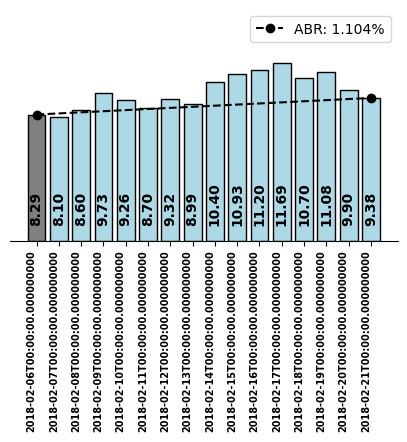

In [33]:
indexes = {"buy" : 33, "hold" : 27, "sell" : 2}
label = "buy"

startindex = indexes[label]
finishindex = indexes[label] + 30

benchmarkstart = finishindex - 1
benchmarkfinish = benchmarkstart + 16

series = PriceDf.Close.values[benchmarkstart: benchmarkfinish]
apc = calculate_average_percentage_change(series)
fig, ax = plt.subplots(figsize=(5, 3))
x_labels = PriceDf.index.values[benchmarkstart: benchmarkfinish]

if label == "buy":
    color = "lightblue"
elif label == "hold":
    color = "beige"
elif label == "sell":
    color = "pink"

colors = [ "grey"] + [color] * (len(series) - 1)
ax.bar(range(len(series)), series, color=colors, edgecolor="black")

for i, value in enumerate(series):
    ax.text(i, 1, f'{value:.2f}', ha='center', va='bottom', rotation=90, fontweight="bold")

ax.plot([0, len(series) - 1], [series[0], series[-1]], "--ok", label=f"ABR: {round(apc, 3)}%")
ax.set_xticks(np.arange(0, 16))
ax.set_xticklabels(x_labels, rotation=90, ha='right', fontweight="bold", fontsize=7)
ax.set_ylim(ymax=np.max(series) * 1.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_visible(False)
ax.set_yticklabels([])
ax.legend()

plt.show()

In [29]:
import shutil
def delgraph2():
    folders = os.listdir("4_SplitImages")
    for folder in folders:
        shutil.rmtree(f"4_SplitImages/{folder}")
# delgraph2()

In [31]:
# import numpy as np

# liste = np.array([3,5,6,8,5,9,5,2,6,8,5,4])
# print(len(liste))
# ws = 4
# fd = 3
# pctlist = []

# for i in range(len(liste) -ws- fd+1):
#     window = liste[i:i+ws]
#     futureday = liste[i+ws-1:i+ws+fd]
#     pctchange = percentage_changes = np.mean(np.diff(futureday) / futureday[:-1] * 100)
#     pctlist.append(pctchange)

#     print(window, futureday, pctchange)